In [1]:
import numpy as np #importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import glob

In [2]:
start = "arochime-invpfbB0329+54_32768chan3ntbin" #setting strings to make calling files easier/shorter, since most of them share the same name
fold = "foldspec_2018-08-16T10:"
icount = "icount_2018-08-16T10:"
end = ".000+30.000000000000004sec"

In [3]:
def half_min_test(num):
    if num == 30:
        return '30'
    else:
        return '00'

In [4]:
pt = np.loadtxt('pulse_times.txt').T
pt = pt.astype(int)

In [5]:
%%time
i = 0
n = len(sorted(glob.glob('test_outputs/*.npy')))/2
for k in range(0,int(n),1):
    rough_plots(pt,i)
    i = i+1

NameError: name 'rough_plots' is not defined

In [23]:
plt.ioff()

In [8]:
#####################################################################

In [5]:
def mask_bands(data):
    for i in range(len(data[0,:])):
        if (i >= 10500 and i <= 11700) or (i >= 13500 and i <= 14000) or (i >= 15000 and i <= 15500): #conditional for noisy frequency bands
            data[:,i] = 0           #weighing down the RFI frequencies
    return data

In [9]:
%%time
n = len(sorted(glob.glob('test_outputs/*.npy')))/2
n = int(n)
master = np.zeros((len(data_fold[0,:,0,0]),n*3))
i = 0

for j in range(0,int(n),1):
    data_fold = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
    data_count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    data_sum = np.sum(data_fold,axis=(2),keepdims=False)
    data_reduced = np.sqrt(data_sum[:,:,0]**2 + data_sum[:,:,3]**2)
    data_sum_count = np.sum(data_count,axis=(2),keepdims=False)
    data_norm = data_reduced/data_sum_count
    data_avg = data_norm/np.mean(data_norm,axis=(0),keepdims=True)
    data_masked = mask_bands(data_avg)
    
    plt.figure(figsize=(10,10))                 #creating figure
    plt.imshow(data_masked[:,:],cmap='viridis',aspect='auto') #plotting data
    plt.colorbar()                                            #showing colour band
    plt.xlabel('Time', size='20')                            #setting plot labels
    plt.ylabel('Frequency', size='20')
    plt.savefig('test_outputs/Test_Figure_'+str(j)+'.png')
    plt.close()

NameError: name 'data_fold' is not defined

In [10]:
help(axes.set_xscale)

AttributeError: module 'matplotlib.axes' has no attribute 'set_xscale'

In [7]:
data_fold = np.zeros((3,32768,521,4))
data_count = np.zeros((3,32768,521))

In [43]:
%%time
n = len(sorted(glob.glob('test_outputs/*.npy')))/2
n = int(n)
master = np.zeros((len(data_fold[0,:,0,0]),n*3))
i = 0

start_range = 443
end_range = 448

for j in range(40,42,1):
    data_fold = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
    data_count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    
    #isolating "on" pulse
    data_fold_ofinterest = np.zeros((len(data_fold[:,0,0,0]),len(data_fold[0,:,0,0]),int(end_range-start_range+1),len(data_fold[0,0,0,:])))
    data_count_ofinterest = np.zeros((len(data_fold[:,0,0,0]),len(data_fold[0,:,0,0]),int(end_range-start_range+1)))
    for h in range(len(data_fold[0,0,:,0])):
        if (h>=start_range and h<=end_range):
            data_fold_ofinterest[:,:,h-start_range,:] = data_fold[:,:,h,:]
            data_count_ofinterest[:,:,h-start_range] = data_count[:,:,h]
            
            
#     data_reduced = np.sqrt(data_fold[:,:,:,0]**2 + data_fold[:,:,:,3]**2)
#     data_norm = data_reduced/data_count
    
#     for l in range(len(data_norm[:,0,0])):
#         for h in range(len(data_norm[0,:,0])):
#             avg = np.mean(data_norm[l,h,:])
#             sigma = np.std(data_norm[l,h,:])
#             if data_norm[l,h,n] >= 3*sigma:

    data_sum = np.sum(data_fold_ofinterest,axis=(2),keepdims=False)
    data_reduced = np.sqrt(data_sum[:,:,0]**2 + data_sum[:,:,3]**2)
    data_sum_count = np.sum(data_count_ofinterest,axis=(2),keepdims=False)
    data_norm = data_reduced/data_sum_count
    data_avg = data_norm/np.mean(data_norm,axis=(0),keepdims=True)
    data_masked = mask_bands(data_avg)
    
    
    
    for k in range(len(data_masked[:,0])):
        master[:,i] = data_masked[k,:]
        i = i+1

plt.figure(figsize=(10,10))                 #creating figure
plt.imshow(master[:,:],cmap='viridis',aspect='auto') #plotting data
plt.colorbar()                                            #showing colour band
plt.xlabel('Time', size='20')                            #setting plot labels
plt.ylabel('Frequency', size='20')
plt.savefig('../Dynamic/Dynamic_Spectra_test_2.png')
# axes.set_xscale()

CPU times: user 1.58 s, sys: 2.59 s, total: 4.17 s
Wall time: 5.36 s


In [6]:
# def load(filenames,j):
#     data_fold = np.load(start+fold+str(filenames[0,j])+":"+half_min_test(filenames[1,j])+end+".npy")    #loading data from folded pulses
#     data_count = np.load(start+icount+str(filenames[0,j])+":"+half_min_test(filenames[1,j])+end+".npy") #loading data from icount file
#     return data_fold, data_count

def load(filenames,i): #function for loading in files in a for loop
    data_fold = np.load(start+fold+str(filenames[0,i])+":"+half_min_test(filenames[1,i])+end+".npy")    #loading data from folded pulses
    data_count = np.load(start+icount+str(filenames[0,i])+":"+half_min_test(filenames[1,i])+end+".npy") #loading data from icount file
    return data_fold, data_count ## shape = (3,32768,512,4), (3,32768,512)

In [7]:
def normalize(data_fold,data_count):                               #function for normalizing raw data
    norm_data = data_fold/data_count.reshape(data_count.shape+(1,))
    return norm_data                                               #shape = (3,32768,512,4)

In [8]:
#^^^^^^^^^^^ Universal
##
##vvvvvvvvvv Only for finding pulses

In [9]:
def meandiv(norm_data,i):                                                  #function for dividing normalized data by mean
                                                                           #of normalized data for a given time along the
                                                                           #time axis for the XX polarization to 'clean'
                                                                           #it up
    mean_div = norm_data[i,:,:,0]/norm_data[i,:,:,0].mean(1, keepdims=True)
    return mean_div                                                        #shape = (32768,512)

In [10]:
def remove_baseline(mean_div):          #function for removing baseline from a given file
    f_summed = np.sum(mean_div,axis=0)  #summing cleaned, normalized data along the frequency axis
                                        #shape = (512)
    base = np.mean(f_summed)            #determining baseline as mean of the weights of the phases along the newly\
                                        #created frequency-summed-over array
    sigma = np.std(f_summed)            #determining standard deviation of the weights of the phases along the newly\
                                        #created frequency-summed-over array
    data_new_baseline = f_summed - base #determining data without baseline by subtracting baseline from newly created\
                                        #frequency-summed-over array
    return data_new_baseline, sigma, base

In [11]:
def find_pulse(data_new_baseline,sigma):
    lower = int(len(data_new_baseline))     #initializing lower bound as maximum possible value
    upper = 0                               #initializing upper bound as minimum possible value
    for i in range(len(data_new_baseline)): #looping over all phases in baseline-corrected phase data
        if (data_new_baseline[i] > sigma):  #conditional to check the positions in the array of the phase values which
                                            #have a weight greater than a standard deviation
            if lower>i:                     #determining lowest and higest values of the phase weights higher than one
                                            #standard deviation to determine start and stop of phase
                lower = i
            elif upper<i:
                upper = i
    return lower, upper

In [37]:
fold = np.load("arochime-invpfbB0329+54_32768chan3ntbinfoldspec_2018-08-16T10:38:30.000+30.000000000000004sec.npy")    #loading data from folded pulses
count = np.load("arochime-invpfbB0329+54_32768chan3ntbinicount_2018-08-16T10:38:30.000+30.000000000000004sec.npy") #loading data from icount file

In [38]:
norm = normalize(fold,count)

In [39]:
mean_data = meandiv(norm,0)
print(mean_data.shape)

(32768, 512)


In [40]:
bounds = np.zeros((3,2))
for i in range(len(norm[:,0,0,0])):
    mean_data = meandiv(norm,i)
    no_baseline_data,stdev = remove_baseline(mean_data)
    lb,ub = find_pulse(no_baseline_data,stdev)
    bounds[i] = (lb-4,ub+4)

In [59]:
# #
# def find_pulse_bounds(nofiles,tbins_per_file,norm):
#     for i in range(len(norm[:,0,0,0])):
#         mean_data = meandiv(norm,i)
#         no_baseline_data,stdev = remove_baseline(mean_data)
#         lb,ub = find_pulse(no_baseline_data,stdev)
#         bounds[j] = (lb-4,ub+4)
#         j = j+1

In [55]:
n = len(sorted(glob.glob('test_outputs/*.npy')))/2
n = int(n)
bounds = np.zeros((int(n*3),3)) #n number of files * 3 time bins per file length
signal_peaks = np.zeros(int(n*3))
All_Folded_Data = np.zeros((n,3,32768,512,4))
All_Count_Data = np.zeros((n,3,32768,512))

In [59]:
%%time
#master = np.zeros((len(data_fold[0,:,0,0]),n*3))
k = 0
for j in range(0,n,1):
    folded = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
    count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    All_Folded_Data[j] = folded
    All_Count_Data[j] = count
    normalized = normalize(folded,count)
    for i in range(len(normalized[:,0,0,0])):
        mean_data = meandiv(normalized,i)
        no_baseline_data,stdev,base = remove_baseline(mean_data)
        lb,ub = find_pulse(no_baseline_data,stdev)
        
        max_signal = np.amax(no_baseline_data)
        for l in range(len(no_baseline_data)):
            if (no_baseline_data[l] == np.amax(no_baseline_data)):
                signal_peaks[k] = l - lb
        
        bounds[k] = (lb,ub,base) #adding 4 addiitonal bins on each end of lower and upper bounds as a buffer
        k = k+1

CPU times: user 1min 47s, sys: 2min 28s, total: 4min 16s
Wall time: 4min 23s


(129,)


In [14]:
def pulse_only_data(normalized,boundaries,j):
    upper = int(boundaries[j,1])
    lower = int(boundaries[j,0])
    diff = upper-lower+1
    pulse_only_norm = np.zeros((len(normalized[:,0,0,0]),len(normalized[0,:,0,0]),diff,len(normalized[0,0,0,:])))
    for h in range(len(normalized[0,0,:,0])):
        if (h>=lower and h<=upper):
            pulse_only_norm[:,:,h-lower,:] = normalized[:,:,h,:]
    return pulse_only_norm

In [15]:
def reduce_data(pulse_only_norm):
    cleaned_pulse_only = pulse_only_norm[:,:,:,0]/pulse_only_norm[:,:,:,0].mean()
    cleaned_pulse_only = cleaned_pulse_only
    Analyzed_Data = np.sum(cleaned_pulse_only,axis=2)
    return Analyzed_Data

In [17]:
%%time
master = np.zeros((int(n*3),len(folded[0,:,0,0])))
k=0
for j in range(0,n,1):
#     folded = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
#     count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    folded_data = All_Folded_Data[j]
    count_data = All_Count_Data[j]
    
    normalized = normalize(folded_data,count_data)
    
    pulse_only = pulse_only_data(normalized,bounds,j)
    Analyzed_Data = reduce_data(pulse_only)
    for l in range(len(Analyzed_Data[:,0])):
        master[k] = Analyzed_Data[l]
        k = k+1

CPU times: user 38.5 s, sys: 43.2 s, total: 1min 21s
Wall time: 1min 21s


(129, 3)


In [19]:
%%time
master = np.zeros((int(n*3),len(folded[0,:,0,0])))
k=0
h=0
for j in range(0,n,1):
#     folded = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
#     count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    folded_data = All_Folded_Data[j]
    count_data = All_Count_Data[j]
    normalized = normalize(folded_data,count_data)
    
    pulse_only = pulse_only_data(normalized,bounds,j)

    new_normalized_data = pulse_only[:,:,:,0]/pulse_only[:,:,:,0].mean(2,keepdims=True)
    mean_norm_f = np.mean(new_normalized_data,axis=1,keepdims=True)
    for i in range(len(new_normalized_data[:,0,0])):
        new_normalized_data[i,:,:] = new_normalized_data[i,:,:] - bounds[h,2]
        new_normalized_data[i,:,:] = new_normalized_data[i,:,:]/mean_norm_f[i,:,:]
        h = h+1
        
    Analyzed_Data = np.sum(new_normalized_data,axis=2)

#     Analyzed_Data = reduce_data(pulse_only)
    for l in range(len(Analyzed_Data[:,0])):
        master[k] = Analyzed_Data[l]
        k = k+1

CPU times: user 28.6 s, sys: 22.1 s, total: 50.7 s
Wall time: 50.7 s


In [16]:
def pulse_only_data_2(normalized,boundaries,j):
    upper = int(boundaries[j,1])
    lower = int(boundaries[j,0])
    diff = upper-lower+1
    pulse_only_norm = np.zeros((len(normalized[:,0,0]),len(normalized[0,:,0]),diff,))
    for h in range(len(normalized[0,0,:])):
        if (h>=lower and h<=upper):
            pulse_only_norm[:,:,h-lower] = normalized[:,:,h]
    return pulse_only_norm

In [39]:
%%time
master = np.zeros((int(n*3),len(folded[0,:,0,0])))
master_2 = np.zeros((int(n*3),3,len(folded[0,:,0,0])))
#cleaned_data = np.zeros((int(n*3),len(folded[0,:,0,0]),len(folded[0,0,:,0]),len(folded[0,0,0,:])))
k=0
h=0
for j in range(0,n,1):
#     folded = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
#     count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    folded_data = All_Folded_Data[j] #getting raw data from master array
    count_data = All_Count_Data[j]
    normalized = normalize(folded_data,count_data) #normalizing raw data
    
    averaged_pulse_only = (normalized[:,:,:,0] + normalized[:,:,:,3])/2 #averaging XX and YY polarization axis
#     averaged_pulse_only = normalized[:,:,:,0] 
    
    pulse_only_norm = pulse_only_data_2(averaged_pulse_only,bounds,j) #selecting portion of normalized data which only contains the pulse
    new_pulse_only_norm = pulse_only_norm/pulse_only_norm.mean(axis=2,keepdims=True)
    #new_pulse_only_norm = pulse_only_norm.mean(axis=2, keepdims=True)
    
#     pulse_only_averaged = pulse_only_norm/pulse_only_norm.mean(axis=2,keepdims=True)
    
    for i in range(len(new_pulse_only_norm[:,0,0])):
        new_pulse_only_norm[i,:,:] = new_pulse_only_norm[i,:,:]/bounds[h,2] - 1 #on pulse/off pulse -1
        h = h+1
    
    masked_pulse_data = mask_bands(new_pulse_only_norm[:,:,0])
#     interim_norm = new_pulse_only_norm[:,:,0]
#     for k in range(int(len(new_pulse_only_norm[0,0,:])-1)):
#         interim_norm = np.hstack((interim_norm, new_pulse_only_norm[:,:,k+1]))

#     new_normalized_data = pulse_only_averaged/pulse_only_averaged.mean(2,keepdims=True) #dividing averaged pulse only data by it's mean along the phase axis
    
#     mean_norm_f = np.mean(new_normalized_data,axis=1,keepdims=True)
#     for i in range(len(new_normalized_data[:,0,0])):
#         new_normalized_data[i,:,:] = new_normalized_data[i,:,:]/mean_norm_f[i,:,:]
        
#     #Analyzed_Data = np.sum(new_normalized_data,axis=2)
# #     master_2[j] = Analyzed_Data

#     stacked_data = new_normalized_data[:,:,0] #initializing stacked data
#     for k in range(len(new_normalized_data[0,0,:])-1):
#         stacked_data = np.hstack((stacked_data,new_normalized_data[:,:,k+1]))

# #    stacked_data = np.hstack((new_normalized_data[0],new_normalized_data[1],new_normalized_data[2]))#stacking the data from each one of the timings side by side
    print(len(new_pulse_only_norm[0,0,:]))
    if j != 0:
        master_stack = np.concatenate((master_stack,new_pulse_only_norm[:,:,0]))
    else:
        master_stack = new_pulse_only_norm[:,:,0]
    
    
# #     Analyzed_Data = reduce_data(pulse_only)
# #     for l in range(len(new_normalized_data[:,0,0])):
# #         master[j] = Analyzed_Data

37
22
22
35
22
22
36
33
25
23
34
34
21
34
22
35
22
23
34
12
24
22
22
35
23
23
21
13
24
11
36
33
34
23
20
21
22
36
33
22
22
25
22
CPU times: user 1min 2s, sys: 50.4 s, total: 1min 53s
Wall time: 1min 53s


In [49]:
%%time
k=0
h=0
for j in range(0,n,1):
    folded_data = All_Folded_Data[j] #getting raw folded data from master array
    count_data = All_Count_Data[j] #getting raw count data from master array
    normalized = normalize(folded_data,count_data) #normalizing raw data
    
    averaged_pulse_only = (normalized[:,:,:,0] + normalized[:,:,:,3])/2 #averaging XX and YY polarization axis
    
    pulse_only_norm = pulse_only_data_2(averaged_pulse_only,bounds,j) #selecting portion of normalized data which only contains the pulse
    new_pulse_only_norm = pulse_only_norm/pulse_only_norm.mean(axis=2,keepdims=True) #dividing pulse by 
    
    for i in range(len(new_pulse_only_norm[:,0,0])):
        new_pulse_only_norm[i,:,:] = new_pulse_only_norm[i,:,:] - 1 #on pulse/off pulse -1
        h = h+1
    
    masked_pulse_data = mask_bands(new_pulse_only_norm[:,:,0])

    if j != 0:
        master_stack = np.concatenate((master_stack,new_pulse_only_norm[:,:,0]))
    else:
        master_stack = new_pulse_only_norm[:,:,0]

CPU times: user 1min 2s, sys: 51.4 s, total: 1min 53s
Wall time: 1min 53s


In [64]:
%%time
k=0
h=0
for j in range(0,n,1):
    folded_data = All_Folded_Data[j] #getting raw folded data from master array
    count_data = All_Count_Data[j] #getting raw count data from master array
    normalized = normalize(folded_data,count_data) #normalizing raw data
    
    averaged_pulse_only = (normalized[:,:,:,0] + normalized[:,:,:,3])/2 #averaging XX and YY polarization axis
    
    pulse_only_norm = pulse_only_data_2(averaged_pulse_only,bounds,j) #selecting portion of normalized data which only contains the pulse
    new_pulse_only_norm = pulse_only_norm/pulse_only_norm.mean(axis=2,keepdims=True) #dividing pulse by 
    
    for i in range(len(new_pulse_only_norm[:,0,0])):
        new_pulse_only_norm[i,:,:] = new_pulse_only_norm[i,:,:] - 1 #on pulse/off pulse -1
        h = h+1
    
    masked_pulse_data = mask_bands(new_pulse_only_norm[:,:,int(signal_peaks[j])])

    if j != 0:
        master_stack = np.concatenate((master_stack,new_pulse_only_norm[:,:,int(signal_peaks[j])]))
    else:
        master_stack = new_pulse_only_norm[:,:,int(signal_peaks[j])]

CPU times: user 1min 2s, sys: 52.8 s, total: 1min 55s
Wall time: 1min 55s


In [122]:
# pulse_only_norm = pulse_only_data_2(averaged_pulse_only,bounds,0)
# pulse_only_norm.shape
# pulse_only_averaged = pulse_only_norm/pulse_only_norm.mean(axis=2,keepdims=True)
# pulse_only.shape
new_pulse_only_norm = pulse_only_norm.mean(axis=2, keepdims=True)
print(new_pulse_only_norm.shape)


(3, 32768, 1)


In [111]:
Analyzed_Data = np.sum(pulse_only_norm,axis=2)

In [23]:
print(new_pulse_only_norm[:,:,0].shape)
Analyzed_Data.shape

(3, 32768)


NameError: name 'Analyzed_Data' is not defined

CPU times: user 2.72 s, sys: 81 ms, total: 2.8 s
Wall time: 2.81 s


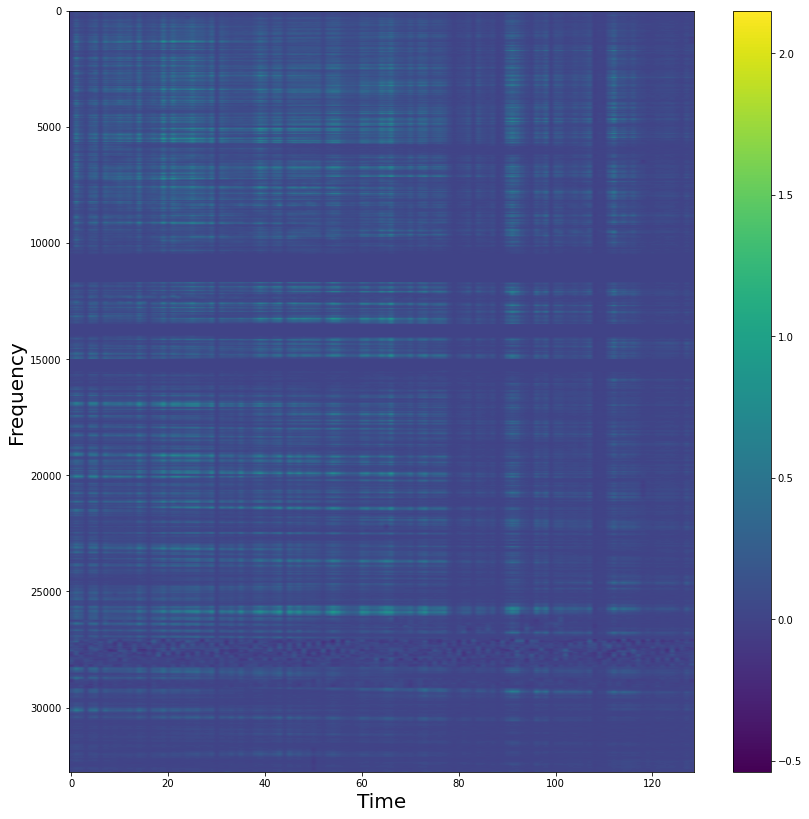

In [65]:
%%time
plt.figure(figsize=(14,14))
plt.imshow(master_stack.T,aspect='auto')
plt.xlabel('Time', size=20)
plt.ylabel('Frequency', size=20)
plt.colorbar()
plt.savefig('../Dynamic/Dynamic_Spectra_test_5.png')
#print(master)

In [55]:
# master = np.zeros((int(n*3),len(folded[0,:,0,0])))
print(master[0].shape)
print(bounds.shape)

(32768,)
(3, 2)


In [41]:
pulse_only_norm_0 = np.zeros(((len(norm[:,0,0,0])),len(norm[0,:,0,0]),int(bounds[0,1]-bounds[0,0]+1),len(norm[0,0,0,:])))
pulse_only_norm_1 = np.zeros(((len(norm[:,0,0,0])),len(norm[0,:,0,0]),int(bounds[1,1]-bounds[1,0]+1),len(norm[0,0,0,:])))
pulse_only_norm_2 = np.zeros(((len(norm[:,0,0,0])),len(norm[0,:,0,0]),int(bounds[2,1]-bounds[2,0]+1),len(norm[0,0,0,:])))

In [42]:
##need to remember to try to do this without a for loop
for h in range(len(norm[0,0,:,0])):
        if (h>=int(bounds[0,0]) and h<=int(bounds[0,1])):
            pulse_only_norm_0[:,:,h-int(bounds[0,0]),:] = norm[:,:,h,:]

In [43]:
cleaned_pulse_only = pulse_only_norm_0[:,:,:,0]/pulse_only_norm_0[:,:,:,0].mean()
print(cleaned_pulse_only.shape)

(3, 32768, 45)


In [44]:
Analyze_Data = np.sum(cleaned_pulse_only,axis=2)
print(Analyze_Data[1].shape)

(32768,)


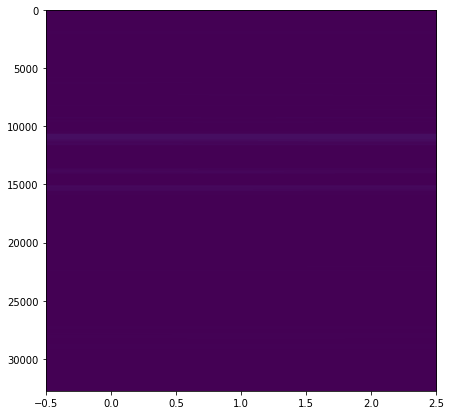

In [56]:
plt.figure(figsize=(7,7))
plt.imshow(Analyze_Data.T,aspect='auto')
#plt.xlim(420,465)
plt.show()

In [37]:

pulse_only_norm_0 = norm[0,:,[int(bounds[0,0]):int(bounds[0,1])],:]
pulse_only_norm_1 = norm[1,:,[bounds[1,0]:bounds[1,1]],:]
pulse_only_norm_2 = norm[2,:,[bounds[2,0]:bounds[2,1]],:]

SyntaxError: invalid syntax (<ipython-input-37-84678b66a8e9>, line 1)

In [94]:
norm.shape
new_data = norm[:,:,:,0]/norm[:,:,:,0].mean(2,keepdims=True) #creating a new array from normalized raw data, by dividing the normalized data by it's own mean across the phase axis
mean_norm = np.mean(new_data,axis=1,keepdims=True) #determining the mean of the new data set just created along the frequency axis

mn = np.zeros(3)
sigma = np.zeros(3)
for i in range(len(d[:,0,0,0])):
    freq_phase_i = d[i,:,:,0] #selecting only frequency vs phase for a single time axis
    freq_phase_i = freq_phase_i/freq_phase_i.mean(1, keepdims=True) #dividing frequency vs phase array by mean across phase
    
    phases_i = np.sum(freq_phase_i,axis=0) #summing along the frequency axis
    
    mn[i] = np.mean(phases_i) #determining mean of signal across phases
    sigma[i] = np.std(phases_i) #determining stdev of signal across phases
    phases_i_nb = phases_i-mn[i] #zero-ing baseline

for i in range(len(new_data[:,0,0])): #creating a for loop to itterate over the time axis of the new data set
    new_data[i,:,:] = new_data[i,:,:] - mn[i] #new normalized dataset including all 3 times minus the mean of the signal across phases calculated from each time axis
    new_data[i,:,:] = new_data[i,:,:]/mean[i,:,:] #dividing the previous line by mean value of the new data set across each axis

#d_new.shape
stacked_d = np.hstack((d_new[0,:,420:465],d_new[1,:,420:465],d_new[2,:,420:465]))#stacking the data from each one of the timings side by side

(3, 32768, 512, 4)

In [55]:
stacked_data = np.hstack((new_data[int(bounds[0,0]):int(bounds[0,1])],new_data[int(bounds[1,0]):int(bounds[1,1])],new_data[int(bounds[2,0]):int(bounds[2,1])]))

In [57]:
# plt.figure(figsize=(10,10))
# plt.imshow(stacked_data,aspect='auto')
# plt.show()

In [60]:
data_fold = fold #loading in raw data
data_count = count
d = data_fold/data_count.reshape(data_count.shape+(1,)) #normalizing data, reshaping the icount data into a 4 dim array

In [79]:
mn = np.zeros(3)
sigma = np.zeros(3)
for i in range(len(d[:,0,0,0])):
    d2 = d[i,:,:,0] #selecting only frequency vs phase
    d2 = d2/d2.mean(1, keepdims=True) #dividing by mean

#     plt.figure(figsize=(4,4))
#     plt.imshow(d2,aspect='auto')
#     plt.xlim(420,465)
#     plt.show()
    
    d3 = np.sum(d2,axis=0) #summing along the frequency axis
#     plt.plot(d3)
#     plt.show()
    
    mn[i] = np.mean(d3) #determining mean of signal across phases
    sigma[i] = np.std(d3) #determining stdev of signal across phases
    d3_nb = d3-mn[i] #zero-ing baseline

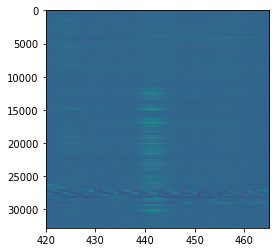

In [67]:
d2 = d[0,:,:,0] #selecting only frequency vs phase
d2 = d2/d2.mean(1, keepdims=True) #dividing by mean

plt.figure(figsize=(4,4))
plt.imshow(d2,aspect='auto')
plt.xlim(420,465)
plt.show()

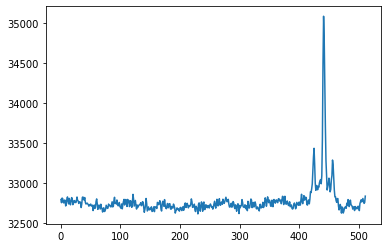

In [68]:
d3 = np.sum(d2,axis=0) #summing along the frequency axis
plt.plot(d3)
plt.show()

In [70]:
mn = np.mean(d3) #determining mean of signal across phases
sigma = np.std(d3) #determining stdev of signal across phases
d3_nb = d3-mn #zero-ing baseline
for i in range(len(d3_nb)):
    if (d3_nb[i] > sigma):
        print(i)

422
423
424
425
426
427
434
435
436
437
438
439
440
441
442
443
444
445
446
449
450
451
454
455
456
457
458


In [110]:
d_new = d[:,:,:,0]/d[:,:,:,0].mean(2,keepdims=True) #creating a new normalized dataset including all 3 times from raw data
mean  = np.mean(d_new,axis=1, keepdims=True) #determining mean of this new data set, so it's the mean across the 3 time bins
for i in range(len(d_new[:,0,0])):
    d_new[i,:,:] = d_new[i,:,:] - mn[i] #new normalized dataset including all 3 times minus the mean of the signal across phases calculated from each time axis
    d_new[i,:,:] = d_new[i,:,:]/mean[i,:,:] #dividing the previous line by mean value of the new data set across each axis

#d_new.shape
stacked_d = np.hstack((d_new[0,:,420:465],d_new[1,:,420:465],d_new[2,:,420:465]))#stacking the data from each one of the timings side by side

In [111]:
mean.shape

(3, 1, 512)

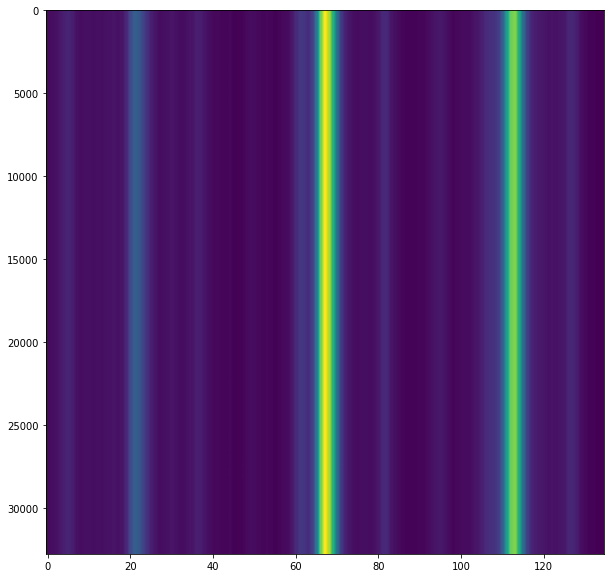

In [112]:
plt.figure(figsize=(10,10))
plt.imshow(stacked_d,aspect='auto')
#plt.xlim(420,465)
plt.show()

In [69]:
mn = np.mean(d3)
# sigma = np.std(d3)
# for i in len(d3):
#     if (d3[i] > (3*sigma + mn)):
        

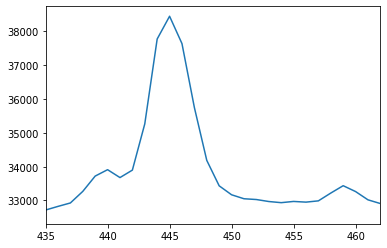

In [60]:
d3 = np.sum(d2,axis=0)
plt.plot(d3)
plt.xlim(435,462)
plt.show()

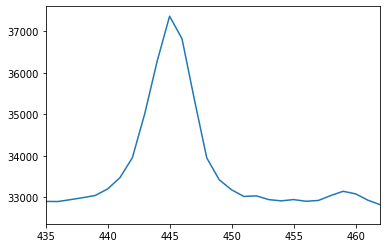

In [61]:
d2_1 = d[1,:,:,0]
d2_1 = d2_1/d2_1.mean(1, keepdims=True)
d3_1 = np.sum(d2_1,axis=0)
plt.plot(d3_1)
plt.xlim(435,462)
plt.show()

In [ ]:
d2_1 = d[1,:,:,0]
d2_1 = d2_1/d2_1.mean(1, keepdims=True)
d3_1 = np.sum(d2_1,axis=0)
plt.plot(d3_1)
#plt.xlim(420,465)
plt.show()

In [20]:
%%time
n = len(sorted(glob.glob('test_outputs/*.npy')))/2
n = int(n)
master = np.zeros((len(data_fold[0,:,0,0]),n*3))
i = 0

data_fold = np.zeros((3,32687,521,4))
data_count = np.zeros((3,32687,521))

for j in range(0,int(n),1):
    data_fold = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
    data_count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    
    data_sum = np.sum(data_fold,axis=(2),keepdims=False)
    data_reduced = np.sqrt(data_sum[:,:,0]**2 + data_sum[:,:,3]**2)
    data_sum_count = np.sum(data_count,axis=(2),keepdims=False)
    data_norm = data_reduced/data_sum_count
    data_avg = data_norm/np.mean(data_norm,axis=(0),keepdims=True)
    data_masked = mask_bands(data_avg)
    for k in range(len(data_masked[:,0])):
        master[:,i] = data_masked[k,:]
        i = i+1


plt.figure(figsize=(10,10))                 #creating figure
plt.imshow(master[:,:],cmap='viridis',aspect='auto') #plotting data
plt.colorbar()                                            #showing colour band
plt.xlabel('Time', size='20')                            #setting plot labels
plt.ylabel('Frequency', size='20')
plt.savefig('../Dynamic/Dynamic_Spectra_test.png')
# axes.set_xscale()

CPU times: user 53.3 s, sys: 25.7 s, total: 1min 18s
Wall time: 1min 20s


[[14143.5859375  14396.27929688 14856.58300781 ... 27691.39453125
  27205.8984375  27060.79492188]
 [13688.41503906 13935.09082031 14386.66503906 ... 27593.82421875
  27109.45507812 26963.06640625]
 [13442.03808594 13681.84863281 14122.36425781 ... 27610.53710938
  27122.23632812 26977.66210938]
 ...
 [13004.22558594 13235.30566406 13657.04785156 ... 27458.5234375
  26977.890625   26838.41210938]
 [13029.43554688 13262.19921875 13687.43066406 ... 27673.73046875
  27188.9375     27039.29492188]
 [13141.49023438 13375.79589844 13804.88378906 ... 27394.08789062
  26914.96289062 26781.61328125]]


In [13]:
def new_norm_3(fold_data,icount_data):                  #creating function for normalizing folded pulse data
    norm_data_r = fold_data[:,:,:,0]/icount_data[:,:,:] #normalizing data
    norm_data_i = fold_data[:,:,:,3]/icount_data[:,:,:] #normalizing data
    return norm_data_r, norm_data_i

In [15]:
def average(norm_data):
    # averaged_data[axis=(1)] = norm_data[axis=(1)]/avg[axis=(1)]
    return (norm_data/np.mean(norm_data,axis=(0,2),keepdims=True)) #taking the average of the time and phase axis for the normalized data, and dividing the normalized data by the resuling array

In [16]:
data_fold = np.load(start+fold+"47:30"+end+".npy")
data_count = np.load(start+icount+"47:30"+end+".npy")
real_normd,img_normd = new_norm_3(data_fold,data_count)

masked_data_r,masked_data_i = mask_bands(real_normd),mask_bands(img_normd)
avg_data_r,avg_data_i = average(masked_data_r),average(masked_data_i)


<ipython-input-15-a54c08fd38bc>:3: RuntimeWarning: invalid value encountered in true_divide
  return (norm_data/np.mean(norm_data,axis=(0,2),keepdims=True)) #taking the average of the time and phase axis for the normalized data, and dividing the normalized data by the resuling array


In [36]:
%%time
pt = np.loadtxt('pulse_times.txt').T
pt = pt.astype(int)

freqs = np.zeros((43,32768))

i = 0
#n = len(sorted(glob.glob('test_outputs/*.npy')))/2
n = 1

for j in range(0,int(n),1):
    data_fold = np.load(start+fold+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy")    #loading data from folded pulses
    data_count = np.load(start+icount+str(pt[0,j])+":"+half_min_test(pt[1,j])+end+".npy") #loading data from icount file
    #sq_data = square(data_fold)
    real_normd,img_normd = new_norm_3(data_fold,data_count)                  #normalizing data
    avg_data_r,avg_data_i = average(real_normd),average(img_normd)                                     #dividing normalized data by time and phase averaged array
    masked_data_r,masked_data_i = mask_bands(avg_data_r),mask_bands(avg_data_i)                                  #weighing down RFI frequencies
    sq_data = square2(masked_data_r,masked_data_i)
    for i in range(len(sq_data(:,0,0))):
        plt.figure(figsize=(8,8))                 #creating figure
        plt.imshow(sq_data[j,:,:],cmap='viridis',aspect='auto') #plotting data
        # plt.yticks(range(0,32768,500))                            #setting additional 'ticks' on y axis such that it is easier to erad off frequency bands
        plt.colorbar()                                            #showing colour band
        plt.xlabel('Time', size='20')                            #setting plot labels
        plt.ylabel('Frequency', size='20')
        #plt.savefig('Dynamic_Figure_4.png')           #saving plot
    
#     #freqs[j,:] = 
#     interm = np.sum(masked_data,axis=(0))
#     freqs[j,:] = np.sum(interm,axis=(1))

    
# plt.figure(figsize=(plot_size,plot_size))                 #creating figure
# plt.imshow(freqs[:,:],cmap='viridis',aspect='auto') #plotting data
# # plt.yticks(range(0,32768,500))                            #setting additional 'ticks' on y axis such that it is easier to erad off frequency bands
# plt.colorbar()                                            #showing colour band
# plt.xlabel('Time', size='20')                            #setting plot labels
# plt.ylabel('Frequency', size='20')
# plt.savefig('Dynamic_Figure_3.png')           #saving plot

SyntaxError: invalid syntax (<unknown>, line 18)